# **Trabajo Práctico N°2 - Aprendizaje Automático 1**
**Integrantes**:

Dito, Daniela

Flaibani, Marcela

López Crespo, facundo

## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


## 1. Análisis descriptivo 

In [4]:
df = pd.read_csv('weatherAUS.csv')
df.shape

(145460, 23)

In [5]:
# Elección aleatoria de 10 ciudades
ciud = pd.Series(df['Location'].unique())
ciud_10 = ciud.sample(n=10,random_state=1)
ciud_10

27        Dartmoor
34       Nuriootpa
39    PerthAirport
48           Uluru
2            Cobar
3     CoffsHarbour
42         Walpole
29          Cairns
45    AliceSprings
30       GoldCoast
dtype: object

In [6]:
# Filtro del df según ciudades seleccionadas y luego descarto la columna ciudad 
df_weather = df[df['Location'].isin(ciud_10)]
df_weather = df_weather.drop('Location',axis=1)

In [7]:
df_weather.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

El dataset a analizar se compone principales de las siguientes variables meteorológicas:
* **Temperatura**: [MinTemp, MaxTemp, Temp9am, Temp3pm]. Variables cuantitativas continuas. 

* **Lluvia**: 

    [Rainfall]. Variable cuantitavia continua.

    [RainToday, RainTomorrow]. Variable cualitativa nominal.
* **Evaporización**: [Evaporation]. Variable cuantitavia .

* **Luminosidad**: [Sunshine]. Variable cuantitativa. 
* **Viento**: 

    [WindSpeed9am, WindSpeed3pm, WindGustSpeed]. Variables cuantitativas continuas.

    [WindGustDir, WindDir9am, WindDir3pm]. Variables cualitativas nominales
* **Humedad**: [Humidity9am, Humidity3pm]. Variables cuantitativas continuas. 

* **Presión**: [Pressure9am, Pressure3pm]. Variables cuantitativas continuas.  
* **Nubosidad**: [Cloud9am, Cloud3pm]. Variables cuantitativas continuas.  


In [127]:
# Elimino las observaciones cuya variable target tiene valor nulo
idx_target_null = df_weather[df_weather['RainTomorrow'].isna()].index
df_weather = df_weather.drop(index=idx_target_null)

In [128]:
df_weather['Date']=pd.to_datetime(df_weather['Date'],format='mixed')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28234 entries, 6049 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           28234 non-null  datetime64[ns]
 1   MinTemp        28193 non-null  float64       
 2   MaxTemp        28211 non-null  float64       
 3   Rainfall       28049 non-null  float64       
 4   Evaporation    18330 non-null  float64       
 5   Sunshine       15473 non-null  float64       
 6   WindGustDir    27545 non-null  object        
 7   WindGustSpeed  27591 non-null  float64       
 8   WindDir9am     26591 non-null  object        
 9   WindDir3pm     27770 non-null  object        
 10  WindSpeed9am   27878 non-null  float64       
 11  WindSpeed3pm   27886 non-null  float64       
 12  Humidity9am    27887 non-null  float64       
 13  Humidity3pm    27881 non-null  float64       
 14  Pressure9am    27926 non-null  float64       
 15  Pressure3pm    27926

In [129]:
df_weather.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6051,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,NaN,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No
6052,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No


In [130]:
# Solamente se describen variables cuantitativas
round(df_weather.describe(),1)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,28234,28193.0,28211.0,28049.0,18330.0,15473.0,27591.0,27878.0,27886.0,27887.0,27881.0,27926.0,27926.0,16528.0,16014.0,28213.0,28210.0
mean,2013-05-11 06:26:23.622582528,13.6,25.0,2.6,5.8,8.0,40.1,15.3,19.5,63.6,49.5,1017.5,1014.9,3.9,4.0,19.0,23.4
min,2008-12-01 00:00:00,-5.2,7.0,0.0,0.0,0.0,9.0,0.0,0.0,1.0,1.0,982.0,985.1,0.0,0.0,-0.3,5.3
25%,2011-02-25 00:00:00,8.7,19.7,0.0,2.8,5.3,31.0,9.0,13.0,50.0,30.0,1013.0,1010.4,1.0,1.0,13.9,18.4
50%,2013-07-16 00:00:00,13.4,24.9,0.0,5.0,9.0,39.0,15.0,19.0,65.0,52.0,1017.4,1014.8,4.0,4.0,18.9,23.2
75%,2015-07-05 18:00:00,18.7,29.8,0.6,8.0,10.9,46.0,20.0,24.0,80.0,66.0,1021.9,1019.3,7.0,7.0,24.2,28.0
max,2017-06-25 00:00:00,31.0,46.6,371.0,86.2,14.3,117.0,72.0,87.0,100.0,100.0,1040.4,1037.7,8.0,8.0,39.4,45.2
std,NaN,6.4,6.9,10.2,4.3,3.7,11.9,8.2,8.2,22.1,23.2,6.6,6.6,2.9,2.8,6.6,6.8


In [131]:
# Obtengo el porcentaje de valores faltantes por feature
round(df_weather.isna().sum().sort_values(ascending=False) / len(df_weather) * 100, 0) 

Sunshine         45.0
Cloud3pm         43.0
Cloud9am         41.0
Evaporation      35.0
WindDir9am        6.0
WindGustDir       2.0
WindGustSpeed     2.0
WindDir3pm        2.0
WindSpeed9am      1.0
Humidity3pm       1.0
WindSpeed3pm      1.0
Humidity9am       1.0
Pressure9am       1.0
Pressure3pm       1.0
RainToday         1.0
Rainfall          1.0
MinTemp           0.0
Temp3pm           0.0
MaxTemp           0.0
Temp9am           0.0
Date              0.0
RainTomorrow      0.0
dtype: float64

In [132]:
# Interesa distinguir las features cuantitativas de aquellas features cualitativas
features_cuanti = list(df_weather.describe().columns)
features_cuali = [feature for feature in df_weather.columns if (feature not in features_cuanti) and (feature!='RainTomorrow')]
print(f'Features cuantitativas:\n')
[print(feature_cuanti) for feature_cuanti in features_cuanti]
print(f'Features cualitativas:\n')
[print(feature_cuali) for feature_cuali in features_cuali]
# Elimino feature date de cuanti para que después no traiga problemas
features_cuanti.remove('Date')

Features cuantitativas:

Date
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
Features cualitativas:

WindGustDir
WindDir9am
WindDir3pm
RainToday


In [133]:
# Las variables cualitativas que presenta el df son de tipo nominal, pues no se pueden ordenar jerárquicamente
[print(f"{feature_cuali}:\n{df_weather[feature_cuali].unique()}") for feature_cuali in features_cuali]
    

WindGustDir:
['SSW' 'S' 'SE' 'NNE' 'WNW' 'N' 'ENE' 'NE' 'E' 'SW' 'W' 'WSW' 'NNW' 'ESE'
 'SSE' 'NW' nan]
WindDir9am:
['ENE' 'SSE' nan 'NNE' 'WNW' 'NW' 'N' 'S' 'SE' 'NE' 'W' 'SSW' 'E' 'NNW'
 'ESE' 'WSW' 'SW']
WindDir3pm:
['SW' 'SSE' 'N' 'NNW' 'WSW' 'WNW' 'S' 'ENE' 'SE' 'NNE' 'NW' 'E' 'ESE' 'NE'
 'SSW' 'W' nan]
RainToday:
['No' 'Yes' nan]


[None, None, None, None]

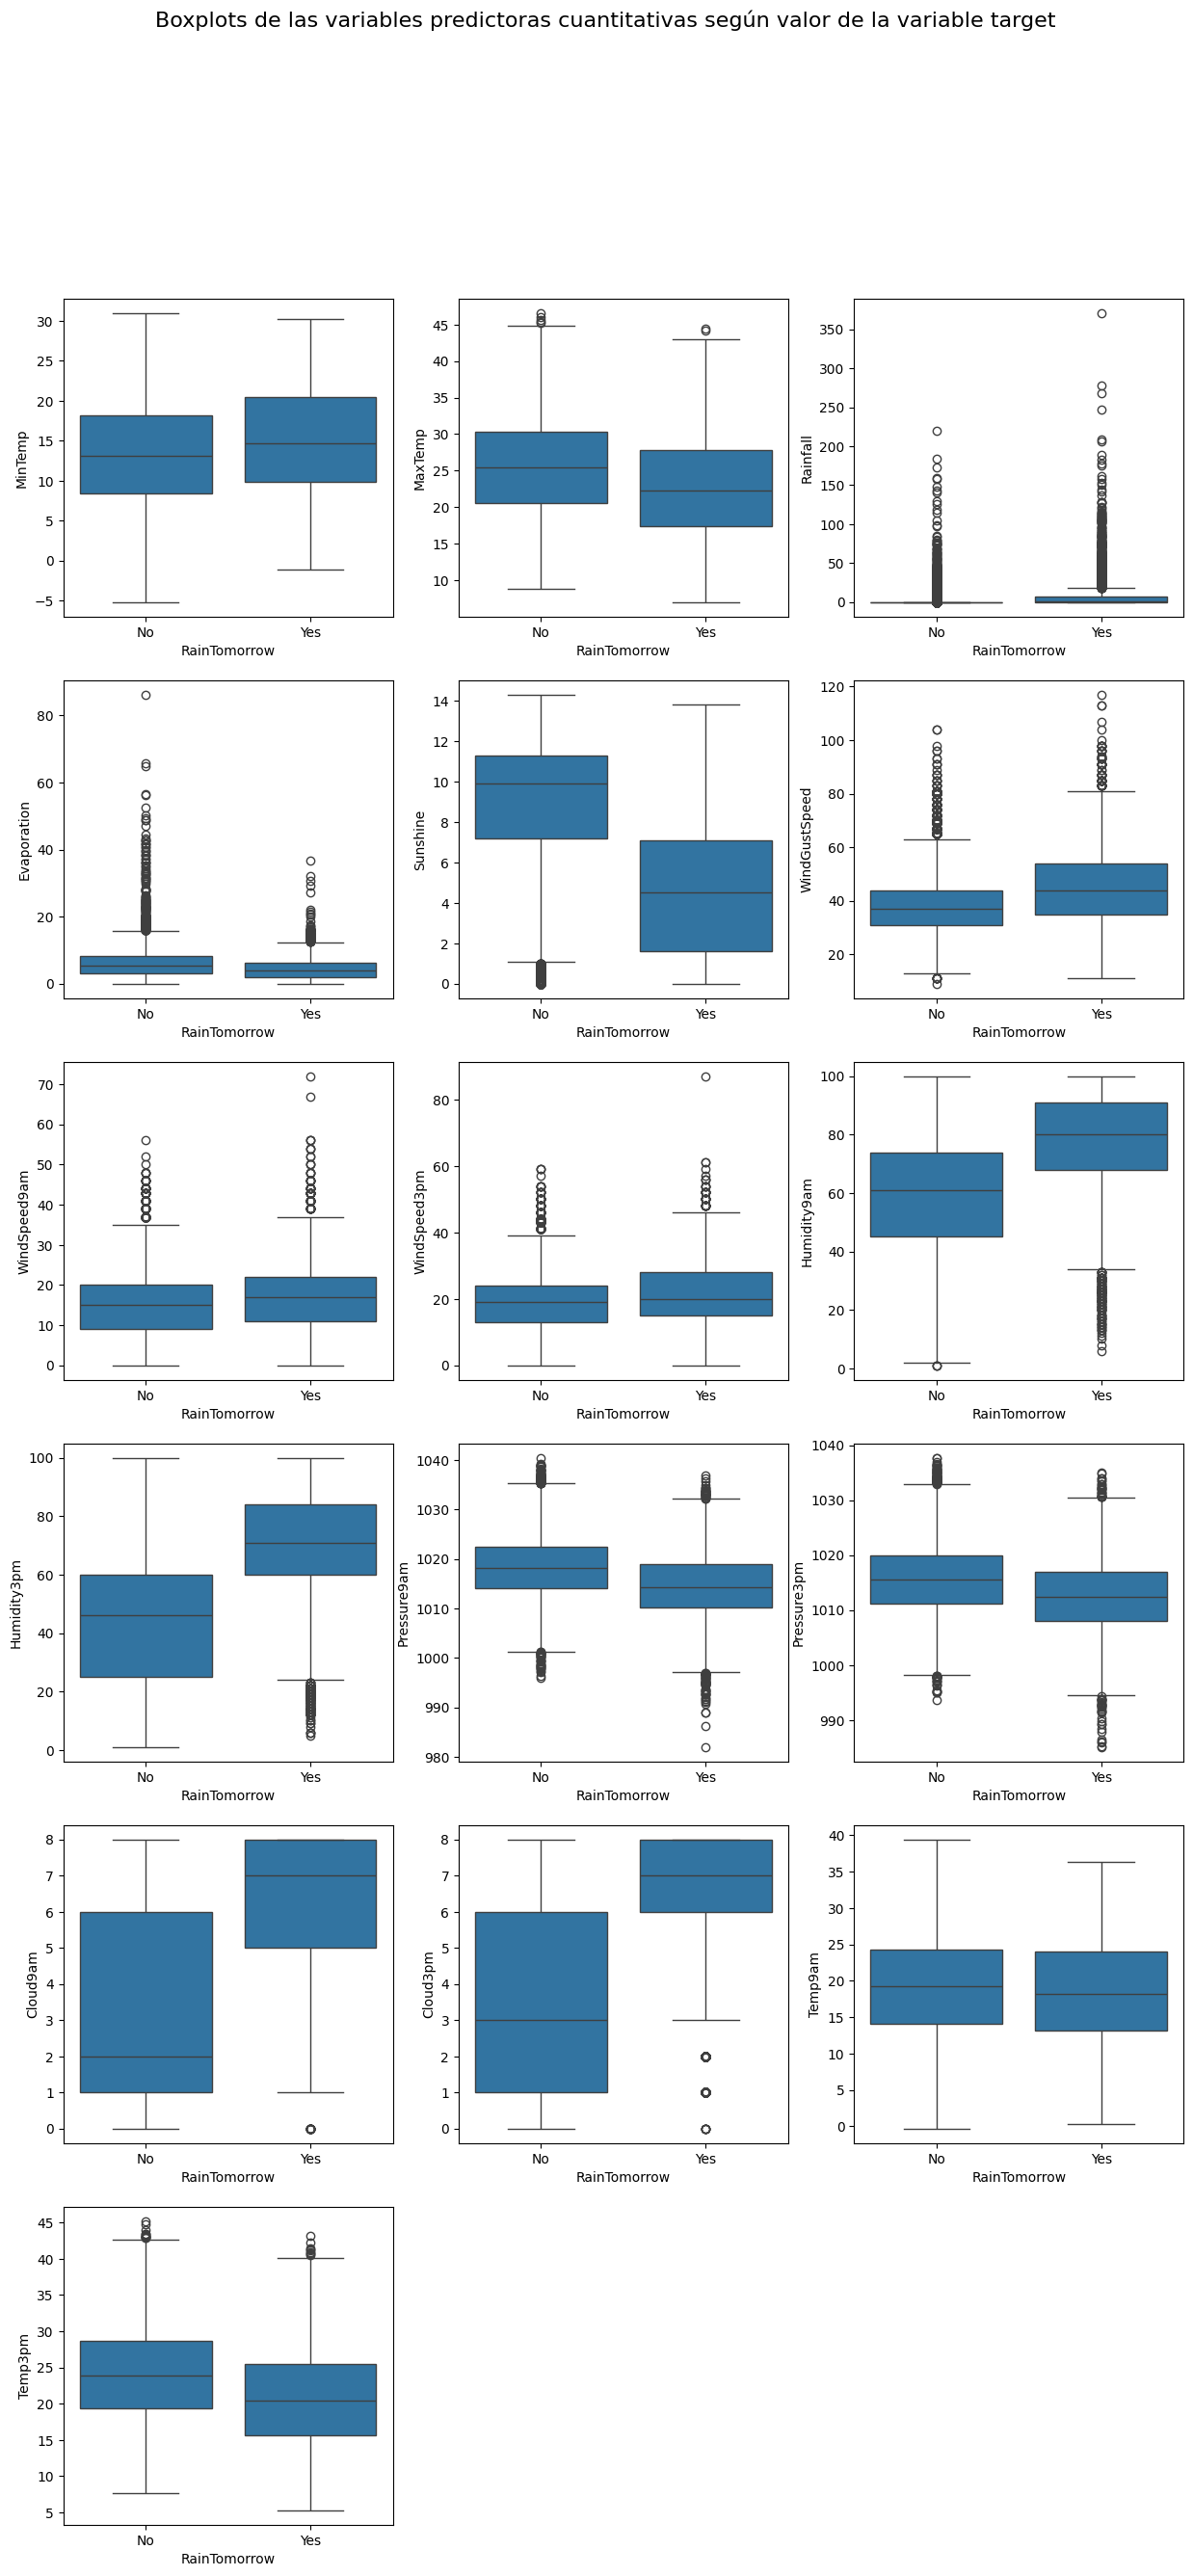

In [134]:
n_features_cuanti = len(features_cuanti)
n_col = 3
n_row = n_features_cuanti//n_col if n_features_cuanti%n_col == 0 else  n_features_cuanti//n_col + 1
fig, axes = plt.subplots(nrows=n_row,ncols=n_col,figsize=(n_col*5,5*n_row))
fig.suptitle('Boxplots de las variables predictoras cuantitativas según valor de la variable target',fontsize=16)
fig.subplots_adjust(hspace=0.2)
for i,feature in enumerate(features_cuanti):
    # Posición de cada boxplot 
    row = i//n_col
    col = i%n_col
    sns.boxplot(data=df_weather,x='RainTomorrow',y=feature,ax=axes[row, col])
    #axes[row, col].set_title(feature)
    #axes[row, col].set_xlabel('Target')
    #axes[row, col].set_ylabel(feature)

# Eliminar subplots vacíos si es necesario
if n_features_cuanti % n_col != 0:
    for i in range(n_features_cuanti % n_col, n_col):
        fig.delaxes(axes[n_row - 1, i])

plt.show()

ADVERTENCIA: Se observa que las features vinculadas con la nubosidad (sunshine | cloud 9 am | cloud 3 pm)
son muy importante para explicar la variable target, sin embargo, para un alto porcentaje de las observaciones no se dispone de los datos relativos a la nubosidad. 

In [135]:
# Obtengo el porcentaje de valores atípicos por feature cuantitativa
serie_porcentaje_atipicos = pd.Series()
for feature in features_cuanti:
    serie = df_weather[feature]
    q1 , q3 = serie.quantile(q=[0.25,0.75])
    r_i = q3 - q1
    lim_inf = q1 - 1.5 * r_i
    lim_sup = q3 + 1.5 * r_i
    # En caso que trate atípicos puede ser conveniente la línea de abajo
    #feature_idx_atipicos =  serie[ (serie<lim_inf) | (serie>lim_sup) ].index
    n_atipicos =  serie[ (serie<lim_inf) | (serie>lim_sup) ].count()
    n_no_nan = serie.count()
    porcen_atipicos = round(n_atipicos / n_no_nan * 100,2)  
    serie_porcentaje_atipicos[feature] = porcen_atipicos
serie_porcentaje_atipicos.sort_values(ascending=False) 

Rainfall         20.42
WindGustSpeed     2.65
Evaporation       1.82
WindSpeed3pm      1.50
WindSpeed9am      1.13
Pressure9am       0.71
Pressure3pm       0.60
Humidity9am       0.10
Temp3pm           0.07
MaxTemp           0.02
MinTemp           0.00
Sunshine          0.00
Humidity3pm       0.00
Cloud9am          0.00
Cloud3pm          0.00
Temp9am           0.00
dtype: float64

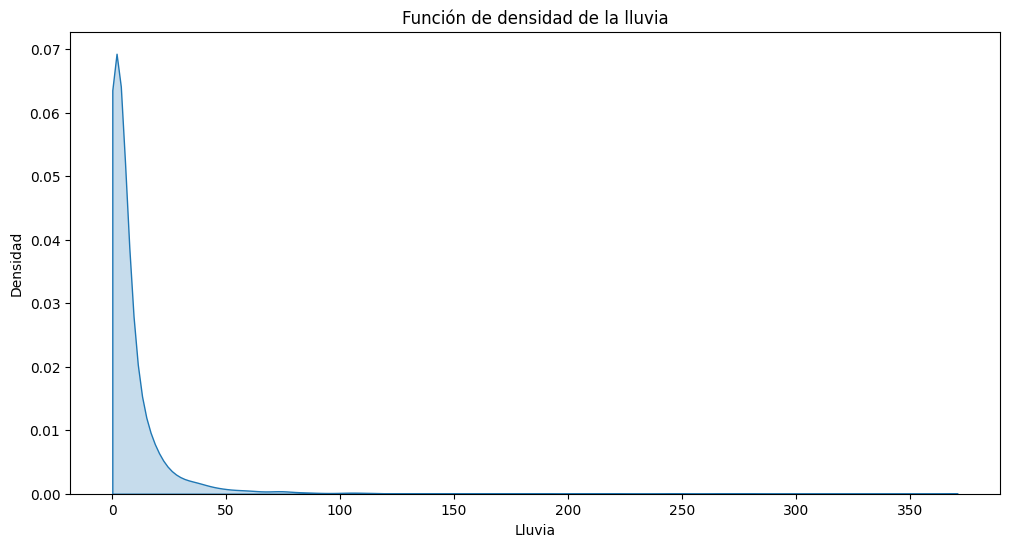

In [136]:
# Se grafica la función de densidad de la feature Rainfall para aquellos días que llovió
s_lluvia = df_weather[df_weather['Rainfall']>0]['Rainfall']
bandwidth = 1.5
plt.figure(figsize=(12, 6))
sns.kdeplot(data=s_lluvia, fill=True, bw_adjust=bandwidth,cut=0)
plt.title('Función de densidad de la lluvia')
plt.xlabel('Lluvia')
plt.ylabel('Densidad')
current_values = plt.gca().get_xticks()
plt.show()

In [137]:
rangos_lluvia = pd.cut(s_lluvia,bins=range(0,401,50), right=True)
df_frec_lluvia = rangos_lluvia.value_counts().sort_index().reset_index()
df_frec_lluvia.rename(columns={'Rainfall':'Rainfall','count':'Frecuencia_absoluta'},inplace=True)
df_frec_lluvia.set_index('Rainfall',inplace=True)
df_frec_lluvia['Frecuencia_relativa'] = round(df_frec_lluvia['Frecuencia_absoluta'] / df_frec_lluvia['Frecuencia_absoluta'].sum(),2)
df_frec_lluvia['Frecuencia_absoluta_acumulada'] = df_frec_lluvia['Frecuencia_absoluta'].cumsum()
df_frec_lluvia['Frecuencia_relativa_acumulada'] = df_frec_lluvia['Frecuencia_relativa'].cumsum()
df_frec_lluvia

,Frecuencia_absoluta,Frecuencia_relativa,Frecuencia_absoluta_acumulada,Frecuencia_relativa_acumulada
Rainfall,,,,
"(0, 50]",9420,0.98,9420,0.98
"(50, 100]",157,0.02,9577,1.00
"(100, 150]",42,0.00,9619,1.00
"(150, 200]",12,0.00,9631,1.00
"(200, 250]",4,0.00,9635,1.00
"(250, 300]",2,0.00,9637,1.00
"(300, 350]",0,0.00,9637,1.00
"(350, 400]",1,0.00,9638,1.00


In [138]:
s_lluvia.describe()

count    9638.000000
mean        7.639956
std        16.283058
min         0.100000
25%         0.600000
50%         2.400000
75%         7.800000
max       371.000000
Name: Rainfall, dtype: float64

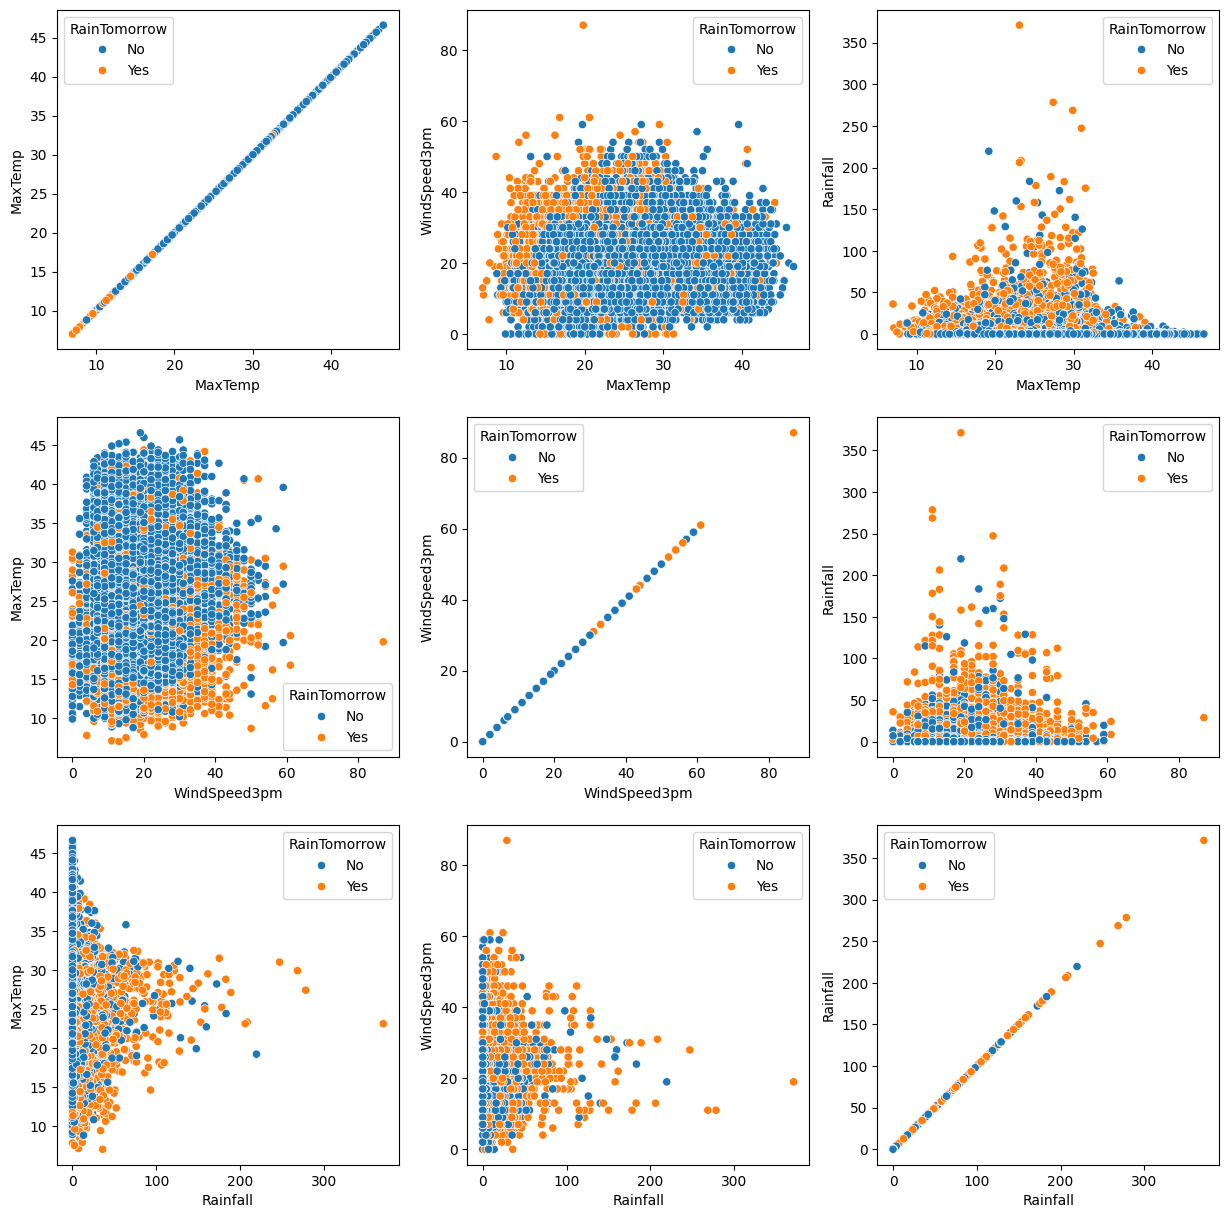

In [139]:
# Por la imposiblidad de ver todos los scatter plot posibles entre cuantitativas, se eligen
#3 features
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
columns = ['MaxTemp','WindSpeed3pm','Rainfall']
fig.subplots_adjust(hspace=0.2)
i = 0
for col in columns:
    j = 0
    for col2 in columns:
        #agregamos labels para usarlas luego
        sns.scatterplot(data=df_weather, x=col, y=col2, hue="RainTomorrow",ax=axs[i,j]) 
        j+=1
    i+=1
plt.show()

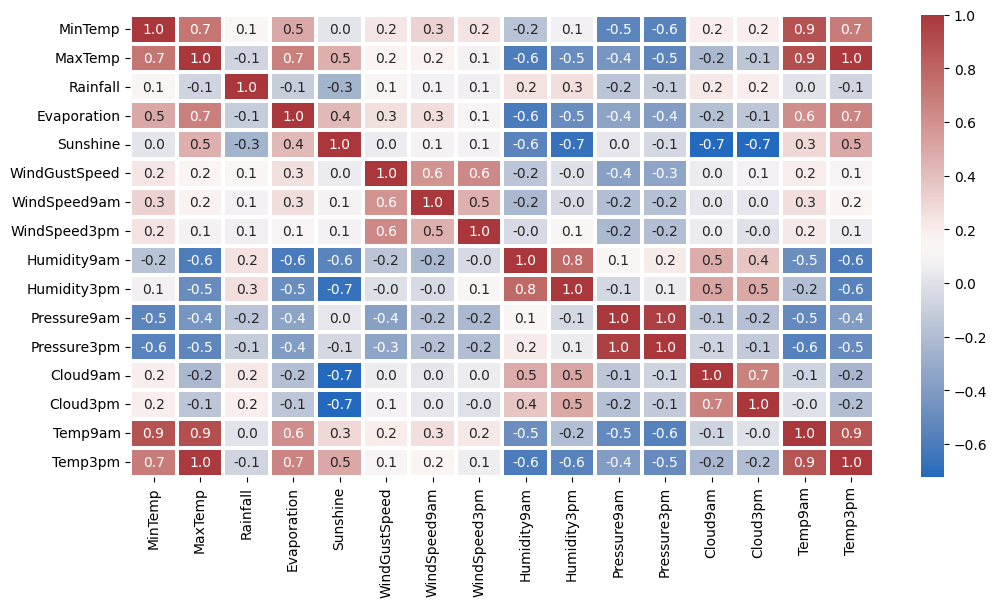

In [140]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_weather[features_cuanti].corr(),annot=True,fmt=".1f",linewidths=1.5,cmap='vlag')
plt.show()

La colinealidad es un rango entre las features. Por un lado, se observa una correlación lineal positiva fuerte entre variables meteorológicas que únicamente difieren en la hora del día en el que fueron registradas. Por el otro, se verifica una correlación negativa de gran intensidad entre variables que naturalmente tienen comportamientos opuestos como la feature sunshine y las features vinculadas con la medición de la nubosidad.

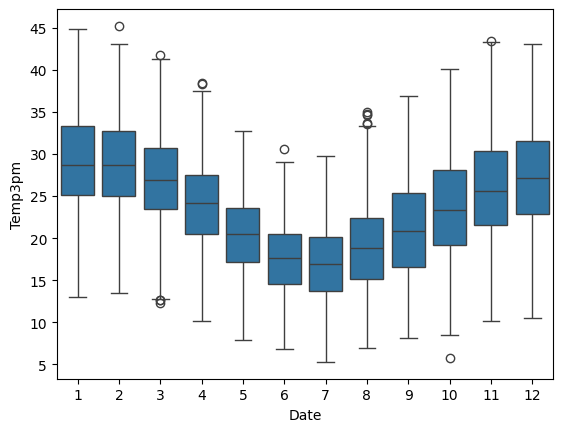

In [141]:
sns.boxplot(data=df_weather,y='Temp3pm',x=df_weather['Date'].dt.month)
plt.show()

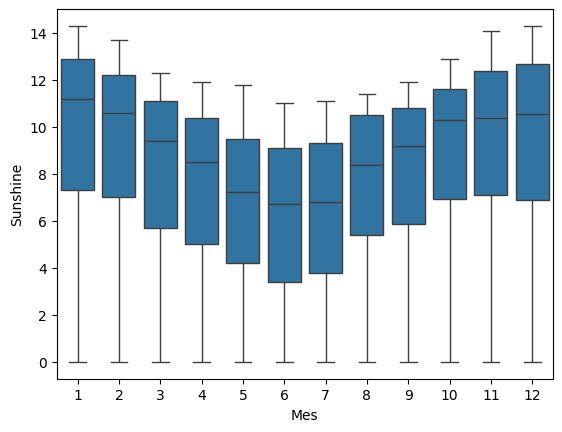

In [142]:
sns.boxplot(data=df_weather,y='Sunshine',x=df_weather['Date'].dt.month)
plt.xlabel('Mes')
plt.show()

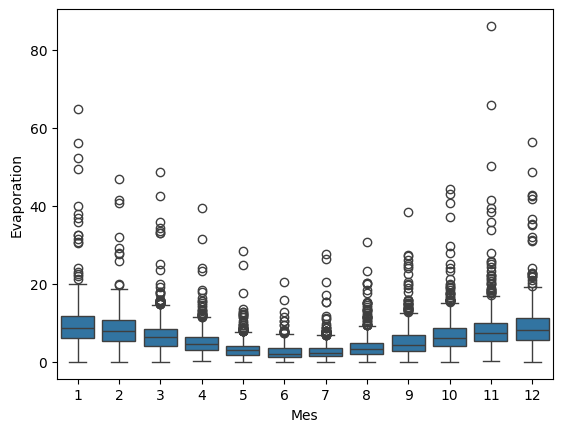

In [143]:
sns.boxplot(data=df_weather,y='Evaporation',x=df_weather['Date'].dt.month)
plt.xlabel('Mes')
plt.show()

In [144]:
# División del DF entre train y test
X = df_weather.drop(columns='RainTomorrow')
y = df_weather['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22587, 21), (5647, 21), (22587,), (5647,))

In [145]:
# Análisis de balanceo del df de entrenamiento
round(y_train.value_counts() / len(y_train) *100,0)

RainTomorrow
No     78.0
Yes    22.0
Name: count, dtype: float64

El dataframe de entrenamiento no está balanceado debido a que más del 75% de las observaciones totales pertenecen a la variable target negativa.

In [146]:
# Tratamiento de valores atípicos para la feature Rainfall
# La lluvia presenta una significatía asimetría positiva. Para evitar distorsiones sobre el valor de los 
# parámetros del modelo, se imputan los valores atípicos de esta variable en base al mayor valor típico observado 
# para la variable en cuestión.
s_lluvia = X_train[X_train['Rainfall']>0]['Rainfall']
q1 , q3 = s_lluvia.quantile(q=[0.25,0.75])
r_i = q3 - q1
valor_tipico_sup = q3 + 1.5 * r_i
idx_lluvia_ati = s_lluvia[s_lluvia>valor_tipico_sup].index
X_train.loc[idx_lluvia_ati,'Rainfall'] = valor_tipico_sup


In [147]:
# Tratamiento de faltantes en features con una alta proporción de valores faltantes
X_train_media_seg_sunshine_by_mes = X_train.groupby(X_train['Date'].dt.month)['Sunshine'].transform('mean')
X_train_media_seg_cloud9am_by_mes = X_train.groupby(X_train['Date'].dt.month)['Cloud9am'].transform('mean')
X_train_media_seg_cloud3pm_by_mes = X_train.groupby(X_train['Date'].dt.month)['Cloud3pm'].transform('mean')
X_train_media_seg_evaporation_by_mes = X_train.groupby(X_train['Date'].dt.month)['Evaporation'].transform('mean')
X_train_imputed = X_train.fillna({
    'Sunshine': X_train_media_seg_sunshine_by_mes,
    'Cloud9am': X_train_media_seg_cloud9am_by_mes,
    'Cloud3pm': X_train_media_seg_cloud3pm_by_mes,
    'Evaporation': X_train_media_seg_evaporation_by_mes,
})
X_test_imputed = X_test.fillna({
    'Sunshine': X_train_media_seg_sunshine_by_mes,
    'Cloud9am': X_train_media_seg_cloud9am_by_mes,
    'Cloud3pm': X_train_media_seg_cloud3pm_by_mes,
    'Evaporation': X_train_media_seg_evaporation_by_mes,
})

In [148]:
# Tratamiento de faltantes en features cualitativas
X_train_moda_dir_nudo_viento = X_train['WindGustDir'].mode()[0]
X_train_moda_dir_viento9am = X_train['WindDir9am'].mode()[0]
X_train_moda_dir_viento3pm = X_train['WindDir3pm'].mode()[0]
X_train_moda_dir_raintoday = X_train['RainToday'].mode()[0]
X_train_imputed = X_train_imputed.fillna({
    'WindGustDir': X_train_moda_dir_nudo_viento,
    'WindDir9am': X_train_moda_dir_nudo_viento,
    'WindDir3pm': X_train_moda_dir_nudo_viento,
    'RainToday': X_train_moda_dir_nudo_viento
})
X_test_imputed = X_test_imputed.fillna({
    'WindGustDir': X_train_moda_dir_nudo_viento,
    'WindDir9am': X_train_moda_dir_nudo_viento,
    'WindDir3pm': X_train_moda_dir_nudo_viento,
    'RainToday': X_train_moda_dir_nudo_viento
})

In [149]:
direction_dict = {
    'SSW':'S',
    'S':'S',
    'SE':'S',
    'NNE':'N',
    'WNW':'W',
    'N':'N',
    'ENE':'E',
    'NE':'N',
    'E':'E',
    'SW':'S',
    'W':'W',
    'WSW':'W',
    'NNW':'N',
    'ESE':'E',
    'SSE':'S',
    'NW':'N'
}

In [150]:
for feature_cuali in features_cuali[:3]:
    X_train_imputed[feature_cuali] = X_train_imputed[feature_cuali].map(direction_dict)
    X_test_imputed[feature_cuali] = X_train_imputed[feature_cuali].map(direction_dict)
X_train_imputed.loc[0]

Date             2016-04-04 00:00:00
MinTemp                         21.5
MaxTemp                         27.7
Rainfall                         0.0
Evaporation                 4.865188
Sunshine                    7.409585
WindGustDir                        E
WindGustSpeed                   28.0
WindDir9am                         E
WindDir3pm                         E
WindSpeed9am                    17.0
WindSpeed3pm                    19.0
Humidity9am                     57.0
Humidity3pm                     54.0
Pressure9am                   1022.0
Pressure3pm                   1019.3
Cloud9am                     4.13153
Cloud3pm                         1.0
Temp9am                         26.2
Temp3pm                         26.0
RainToday                         No
Name: 0, dtype: object

In [102]:
copia = df_weather.copy()
ohc = OneHotEncoder()
ohe = ohc.fit_transform(copia['RainToday'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe,columns=["RainToday_"+str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
copia = pd.concat([copia,dfOneHot],axis=1)
copia

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainToday_No,RainToday_Yes,RainToday_nan
6049,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,1.0,0.0,0.0
6050,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,1.0,0.0,0.0
6051,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,1011.6,NaN,1.0,NaN,32.7,No,No,0.0,1.0,0.0
6052,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,1.0,0.0,0.0
6053,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28229,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
28230,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
28231,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
28232,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0


In [154]:
import math
math.sqrt(9)

3.0

In [74]:
# Tratamiento de faltantes en el resto de las features
imputer = SimpleImputer(strategy='mean')  # Utilizando la media para imputar los valores faltantes
X_train_imputed[features_cuanti] = pd.DataFrame(imputer.fit_transform(X_train_imputed[features_cuanti]), columns=features_cuanti)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_imputed[features_cuanti]), columns=features_cuanti)

In [75]:
# Escalado de datos - falta escalado de variables cuantitativas
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed[features_cuanti]), columns=features_cuanti)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed[features_cuanti]), columns=features_cuanti)

In [76]:
X_train_scaled

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,1.242428,0.391174,-0.415543,-0.251636,-0.201089,-1.033700,0.202341,-0.066462,-0.295405,0.199421,0.688518,0.668325,0.124992,-1.453205,1.090242,0.376083
1,-1.507471,-1.236663,-0.415543,-1.335228,-0.065797,-0.438443,-0.531716,-0.312761,-0.431725,-0.452287,-0.534721,-0.416674,0.515446,0.950571,-0.925948,-1.151031
2,-0.257517,0.405580,-0.415543,-0.322323,-0.016450,-0.438443,0.202341,0.302986,-1.249646,-1.408125,0.627356,0.148748,-1.732497,-1.933960,0.195842,0.508237
3,-1.101236,-0.372325,-0.369565,0.238735,0.016133,-0.778590,-1.388115,-0.805359,0.886036,0.199421,0.321547,-0.065195,0.005280,0.061294,-0.637921,-0.314055
4,1.008062,1.111456,-0.415543,1.277001,1.285691,-0.438443,0.569370,-0.805359,-0.886126,-1.147442,0.841423,0.607198,-1.282908,-0.972450,0.847693,1.095589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22582,0.320587,-0.458759,-0.369565,0.948525,0.555094,0.496961,1.303426,0.549285,-0.658926,-0.104709,-1.757960,-1.043222,-0.001998,-0.019637,0.029089,-0.446209
22583,0.867442,-0.141835,3.860391,0.771110,0.471333,-0.098296,1.792798,0.056687,1.204117,1.329048,-0.213621,-0.034632,1.864212,1.912081,0.029089,-0.108482
22584,-1.819959,-1.107013,-0.415543,-1.015363,-0.655365,-0.608517,-0.776401,-0.559060,0.204435,-0.756417,1.070781,1.172620,-1.282908,-0.972450,-1.577798,-0.989510
22585,-0.882494,-0.487570,-0.415543,-0.535566,0.939156,-0.438443,0.202341,0.056687,0.249875,-0.886759,0.902585,0.714170,-1.282908,-0.972450,-0.728876,-0.284688


In [77]:
features_cuali

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']